# Introduction
- I chose a dataset that contains the different average daily taffic for the different neighborhoods in pittsburgh

- I chose this dataset because I figured it would be a straightforward way to compare the different neighborhoods

- The metric I used was the average daily traffic divided by the size of each neighborhood. I used datasets containing the average daily traffic and the sizes of the neighborhoods in miles squared

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import heapq

In [10]:
data= pd.read_csv("pittTraffic.csv", usecols=["neighborhood", "average_daily_car_traffic"])
validData= data['average_daily_car_traffic']>0
queryMask= data[validData]

data= pd.read_csv("miles.csv", usecols=["neighborhood", "size"])
sizeData= data['size']>0
sizeMask=data[sizeData]


In [11]:
neighborhoodList= []
traffic=[]
result=[]
repeats=[]
neighborhoodDict= {}

for index, row in queryMask.iterrows():         
        {
        neighborhoodList.append(row['neighborhood'])
        }
        
for index, row in queryMask.iterrows():
       traffic.append(row['average_daily_car_traffic'])
        
for i in range(len(traffic)):
    neighborhoodDict[i]=[traffic[i], neighborhoodList[i]]


In [12]:
cleanList=[]
cleanValues=[]

for key, value in neighborhoodDict.items():
    
    value= neighborhoodDict[key]
    
    if value[1] not in cleanList:
        cleanList.append(value[1])
        cleanValues.append(value[0])
    
    else:
        cleanValues[cleanList.index(value[1])]= cleanValues[cleanList.index(value[1])] + value[0]
        
maxValues= []
minValues= []
maxValues.append((heapq.nlargest(3, cleanValues)))
minValues.append((heapq.nsmallest(3, cleanValues)))

maxValues= maxValues[0]
minValues= minValues[0]
minNeighborhoods= []
maxNeighborhoods= []

for i in range(3):
    minNeighborhoods.append(cleanList[cleanValues.index(maxValues[i])])
    maxNeighborhoods.append(cleanList[cleanValues.index(minValues[i])])

In [17]:
sizeList= []
newHoodList=[]
trafficBySize=[]
finalNeighborhoods= []
finalSize=[]
finalTraffic=[]
finalTrafficBySize=[]


for index, row in sizeMask.iterrows():
    sizeList.append(row['size'])

for index, row in sizeMask.iterrows():
    newHoodList.append(row['neighborhood'])

for i in range(len(sizeList)):
    traffic=cleanValues[cleanList.index(newHoodList[i])]
    divided=(traffic/sizeList[i])  
    finalTrafficBySize.append(round(divided,2))
    finalNeighborhoods.append(cleanList[cleanList.index(newHoodList[i])])
    finalTraffic.append(traffic)

finalSize=sizeList

topTrafficBySize=[]
topNeighborhoods=[]
lowTrafficBySize=[]
lowNeighborhoods=[]
lowestNeighborhood=[]
lowestTrafficBySize=[]

topTrafficBySize.append(heapq.nlargest(5, finalTrafficBySize))
topTrafficBySize=topTrafficBySize[0]

lowTrafficBySize.append(heapq.nsmallest(5, finalTrafficBySize))
lowTrafficBySize=lowTrafficBySize[0]

lowestTrafficBySize.append(heapq.nsmallest(1, finalTrafficBySize))
lowestTrafficBySize=lowestTrafficBySize[0]

lowestNeighborhood.append(finalNeighborhoods[finalTrafficBySize.index(lowestTrafficBySize[0])])



for i in range(5):
    topNeighborhoods.append(finalNeighborhoods[finalTrafficBySize.index(topTrafficBySize[i])])
    lowNeighborhoods.append(finalNeighborhoods[finalTrafficBySize.index(lowTrafficBySize[i])])
    
topSize=[heapq.nlargest(1, finalSize)]
topSize=topSize[0][0]
bottomSize=[heapq.nsmallest(1, finalSize)][0]
bottomSize=bottomSize[0]


lemingtonNeighborhood=finalNeighborhoods[finalNeighborhoods.index('Lincoln-Lemington-Belmar')]
lemingtonSize= finalSize[finalNeighborhoods.index('Lincoln-Lemington-Belmar')]

sizeComparison=[topSize, lemingtonSize, bottomSize]
neighborhoodComparison=[finalNeighborhoods[finalSize.index(topSize)], finalNeighborhoods[finalSize.index(lemingtonSize)], finalNeighborhoods[finalSize.index(bottomSize)]]

# Code Summary
- Loaded in average daily car traffic, neighborhoods, and the size of the neighborhoods from Traffic file

- Made Lists containing this data for each unique neighborhood

- Divided the average daily traffic by the size of the neighborhood in m^2 and put in a list to better interpret the data

- Created the graphs shown below


## 5 Lowest Neighborhoods (average daily traffic / size in miles squared)


<BarContainer object of 5 artists>

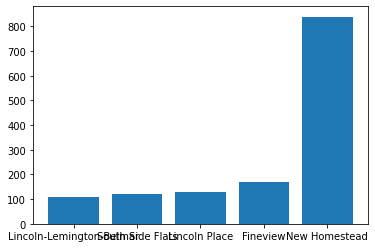

In [18]:
plt.bar(lowNeighborhoods, lowTrafficBySize)

## 3 Highest Neighborhoods (average daily traffic / size in miles squared)

<BarContainer object of 3 artists>

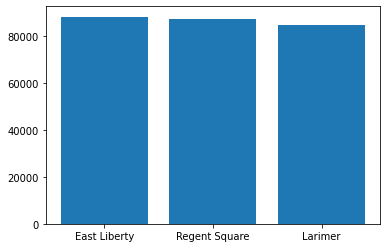

In [15]:
plt.bar(topNeighborhoods, topTrafficBySize)

## Comparison in Size (miles squared) between Lincoln-Leminton-Belmar and Biggest, Smallest

<BarContainer object of 3 artists>

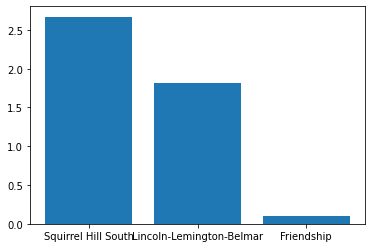

In [16]:
plt.bar(neighborhoodComparison, sizeComparison)

# Conclusion
- The neighborhood with the least amount of traffic by size was Lincoln-Lemington-Belmar
- This would be the best neighborhood based solely on traffic time but the true best neighborhood should take into account more important factors like crime rate and housing price before viewing the traffic time